# Importing the Dataset:

In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\HP-15\Data Trained Projects\titanic_train.csv')
#Visualizing first 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking Null Values in the DataFrame

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see a lot of null values in the columns Age and Cabin, only 2 null values in Embarked column. As there are maximum number of null values in the cabin column which is of no use so we drop the column.

In [4]:
df.drop('Cabin',axis=1,inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We cannot see cabin column in the above dataset, hence the column is dropped.

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Handling the Nan values and replacing the Age column with the mean of the column and Embarked column with mode of the column

In [8]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In Embarked column we see blank spaces so we are replacing it with the Nan values

In [9]:
df['Embarked']=df['Embarked'].replace(" ",np.nan)

In [10]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Hence we have no null values, we can proceed towards visualization

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Making DataFrame for the Nominal Data

In [13]:
df_nominal=df[['Survived', 'Pclass','Sex','SibSp','Parch','Embarked']].copy()

In [14]:
df_nominal.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

# Visualization of Data

For the nominal categorical data we will use countplot as it will give frequency of the columns.

In [15]:
import seaborn as sns

0    549
1    342
Name: Survived, dtype: int64


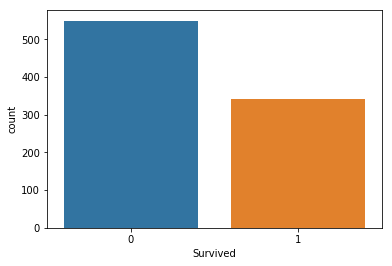

In [16]:
ax=sns.countplot(x='Survived', data=df_nominal)
print(df_nominal['Survived'].value_counts())

From the above observation, Total number of people survived are 342 and not survived are 549

3    491
1    216
2    184
Name: Pclass, dtype: int64


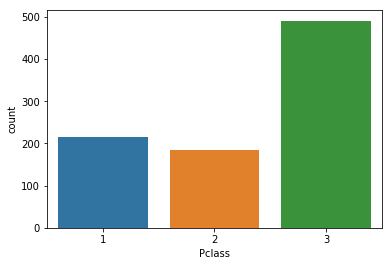

In [17]:
ax=sns.countplot(x='Pclass', data=df_nominal)
print(df_nominal['Pclass'].value_counts())

491 people belong to the 3rd class, 184 from the 2nd class and 216 from the 1st class. Maximum people belong to the third class category.

male      577
female    314
Name: Sex, dtype: int64


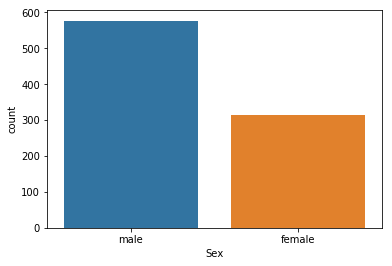

In [18]:
ax=sns.countplot(x='Sex', data=df_nominal)
print(df_nominal['Sex'].value_counts())

577 are Male and 314 are Female. Most of them on the ship are Male.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


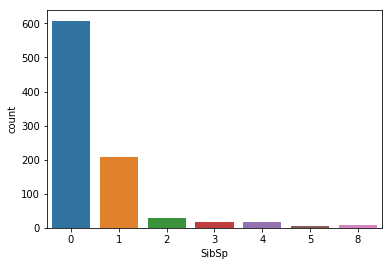

In [19]:
ax=sns.countplot(x='SibSp', data=df_nominal)
print(df_nominal['SibSp'].value_counts())

We can see that most of them do not have a sibling i.e. 608, 209 of them have 1 sibling, 28 have 2 sibling, 16 have 3 siblings, 18 have 4 siblings, 5 have 5 siblings and 8 of them have 7 siblings.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


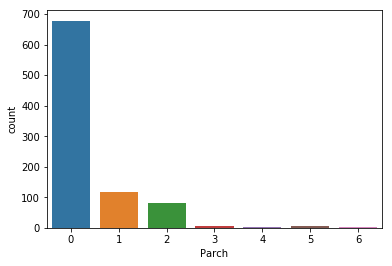

In [20]:
ax=sns.countplot(x='Parch', data=df_nominal)
print(df_nominal['Parch'].value_counts())

Most of them don't have their parents or chidren abroad, 118 have 1 person abroad, 80 have 2 people abroad, 5 have 5 abroad, 5 of them have 3 abroad, 4 have 4 and only 1 has 6 people staying abroad. 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


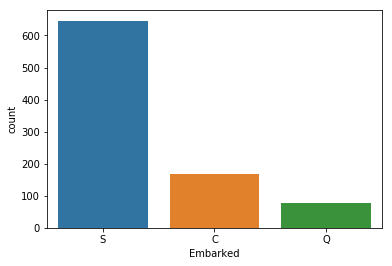

In [21]:
ax=sns.countplot(x='Embarked', data=df_nominal)
print(df_nominal['Embarked'].value_counts())

644 has embarked from the S port, 168 from the C port and 77 from the Q port. Most of the are from S port.

# Making DataFrame of the Ordinal Data

In [22]:
df_ordinal=df[['PassengerId','Name','Ticket']].copy()

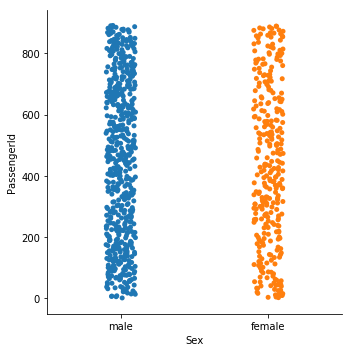

In [23]:
sns.catplot(x='Sex',y='PassengerId',data=df)

# Checking the distribution of the continuous value of the float type columns

In [24]:
df_continuous=[['Age','Fare']].copy()

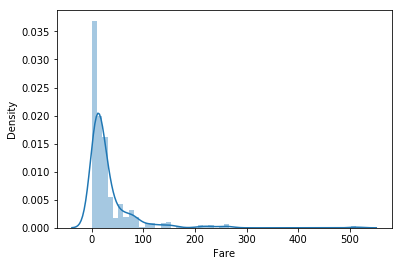

In [27]:
import seaborn as sns
sns.distplot(df['Fare'],kde=True)

The fare is high for only around 50 to 60 people

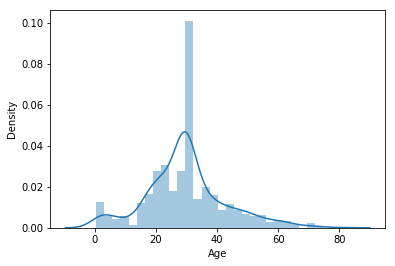

In [28]:
sns.distplot(df['Age'],kde=True)

Most of the people are between the age 20 to 40.

Since the dataset has alot of string values, we will use the encoding techniques to convert the string data to numerical one.

# Encoding of DataFrame

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [30]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
5,6,0,3,554.0,1.0,29.699118,0,0,275.0,8.4583,1.0
6,7,0,1,515.0,1.0,54.000000,0,0,85.0,51.8625,2.0
7,8,0,3,624.0,1.0,2.000000,3,1,395.0,21.0750,2.0
8,9,1,3,412.0,0.0,27.000000,0,2,344.0,11.1333,2.0
9,10,1,2,576.0,0.0,14.000000,1,0,132.0,30.0708,0.0


# Describe Data

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


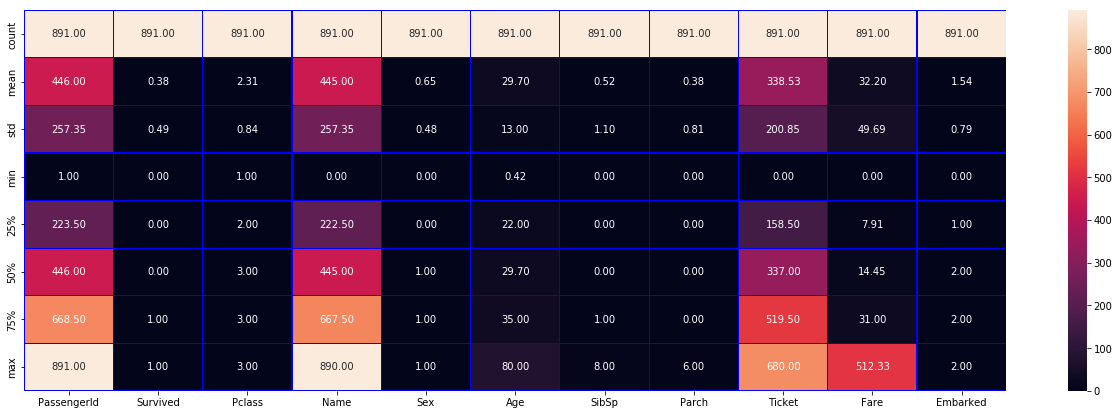

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

With the above heatmap we can see the description of the dataset i.e. mean,median,min,max,std of each column.

# Correlation of columns with the target variable

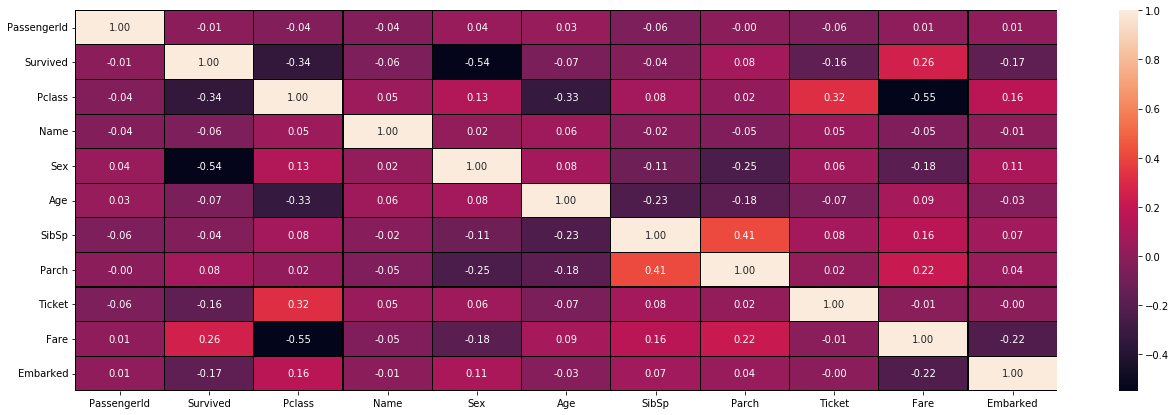

In [34]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

The most highly correlated column is Fare and the least correlated column is Sex

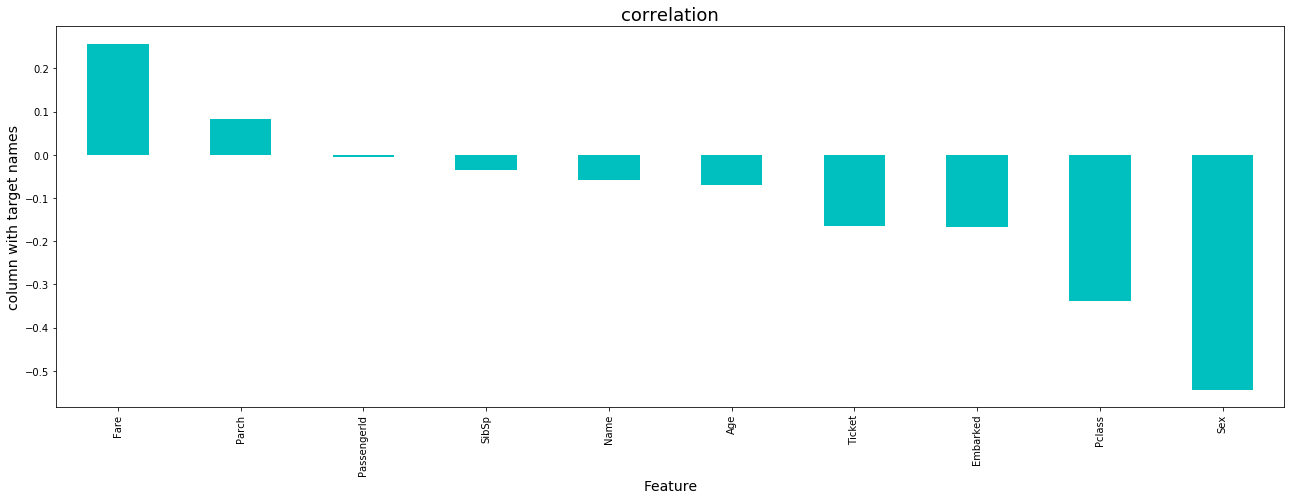

In [35]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can see that only Fare and Parch are positively correlated with the Target variable, rest all columns are negatively correlated.

In [36]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, here are the columns which does not lie in this range.

 Pclass- Categorial data
 
 Sex- Categorial data
 
 Sibsp- Categorial data
 
 Parch- Categorial data
 
 Fare- Continuous data
 
 Embarked- Categorial data

As Fare can be differnent for different category class. Hence, we will not treat that, there's no skewness in data.


# Outliers Check

In [37]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

Checking outliers for int and float type of columns.

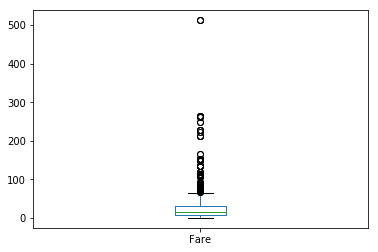

In [38]:
df['Fare'].plot.box()

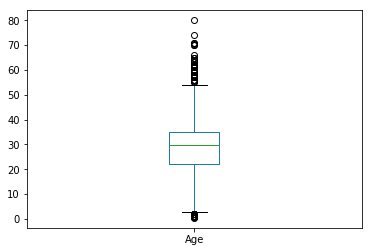

In [39]:
df['Age'].plot.box()

PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Name           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Sex            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Parch                AxesSubplot(0.125,0.125;0.0945122x0.343182)
Ticket            AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Fare              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Embarked          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

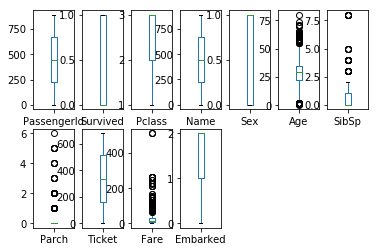

In [40]:
df.plot(kind='box',subplots=True,layout=(2,7))

Hence, we can only see outliers in Age and Fare column. But as we can have different age people and fare can be different for different class, this data can be essential. So, we don't prefer to treat these outliers.

# Separating the columns into x & y

In [41]:
x=df.drop('Survived',axis=1)
y=df['Survived']

# Scaling the data using Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73010796,  0.82737724, -1.31021659, ...,  0.91896631,
        -0.50244517,  0.58595414],
       [-1.72622007, -1.56610693, -0.99141018, ...,  1.28262456,
         0.78684529, -1.9423032 ],
       [-1.72233219,  0.82737724, -0.35768524, ...,  1.64628282,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -0.12441226, ...,  1.67617254,
        -0.17626324,  0.58595414],
       [ 1.72622007, -1.56610693, -1.41518943, ..., -1.64656796,
        -0.04438104, -1.9423032 ],
       [ 1.73010796,  0.82737724, -0.87477369, ...,  0.63501397,
        -0.49237783, -0.67817453]])

In [44]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")
    

At random state 0, the training accuracy is: 0.8075842696629213
At random state 0, the testing accuracy is: 0.7988826815642458


At random state 1, the training accuracy is: 0.797752808988764
At random state 1, the testing accuracy is: 0.7932960893854749


At random state 2, the training accuracy is: 0.8132022471910112
At random state 2, the testing accuracy is: 0.7597765363128491


At random state 3, the training accuracy is: 0.8216292134831461
At random state 3, the testing accuracy is: 0.7597765363128491


At random state 4, the training accuracy is: 0.7991573033707865
At random state 4, the testing accuracy is: 0.8324022346368715


At random state 5, the training accuracy is: 0.800561797752809
At random state 5, the testing accuracy is: 0.8100558659217877


At random state 6, the training accuracy is: 0.7907303370786517
At random state 6, the testing accuracy is: 0.8715083798882681


At random state 7, the training accuracy is: 0.8188202247191011
At random state 7, the testing accu

At random state 77, the training accuracy is: 0.8075842696629213
At random state 77, the testing accuracy is: 0.7821229050279329


At random state 78, the training accuracy is: 0.7963483146067416
At random state 78, the testing accuracy is: 0.8379888268156425


At random state 79, the training accuracy is: 0.800561797752809
At random state 79, the testing accuracy is: 0.8212290502793296


At random state 80, the training accuracy is: 0.8160112359550562
At random state 80, the testing accuracy is: 0.7653631284916201


At random state 81, the training accuracy is: 0.8188202247191011
At random state 81, the testing accuracy is: 0.7430167597765364


At random state 82, the training accuracy is: 0.8047752808988764
At random state 82, the testing accuracy is: 0.8044692737430168


At random state 83, the training accuracy is: 0.8047752808988764
At random state 83, the testing accuracy is: 0.7877094972067039


At random state 84, the training accuracy is: 0.8230337078651685
At random state 84,

The best train and test accuracy we get for random state 6

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8715083798882681
[[106   7]
 [ 16  50]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       113
           1       0.88      0.76      0.81        66

   micro avg       0.87      0.87      0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



We get accuracy of 87% for Logistic Regression

In [47]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8156424581005587
[[96 17]
 [16 50]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       113
           1       0.75      0.76      0.75        66

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



We get accuracy of 81% for Decision Tree Classifier

# Cross Validation of the Model

In [48]:
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7811533229203407 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 3 the cv score is 0.7901234567901234 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 4 the cv score is 0.7912403114196837 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 5 the cv score is 0.7901678389183295 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 6 the cv score is 0.789013846060826 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 7 the cv score is 0.7890153518756584 and accuracy score for training is 0.5182584269662921 and accuracy for the testing is 0.5698324022346368


At cross fold 8 the cv score is 0.7946653431028431 an

Since cv=8 gives the best cross fold score, we select cv=8

In [49]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=8)
print("Cross Validation score of LogisticRegression model: ",scr.mean())

Cross Validation score of LogisticRegression model:  0.7946653431028431


In [50]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=10)
print("Cross Validation score of DecisionTreeClassifier model: ",scr.mean())

Cross Validation score of DecisionTreeClassifier model:  0.7666740438088752


# Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#Creating parameter list to pass in GridSearchCV
parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [53]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [54]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
GCV.best_params_  #Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 3}

In [56]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [57]:
accuracy_score(y_test,GCV_pred)

0.8603351955307262

Hence,the accuracy obatained is 86.5%

# Saving the Model

In [58]:
from sklearn.externals import joblib
joblib.dump(GCV.best_estimator_,'TitanicDTC.pkl')

['TitanicDTC.pkl']